### Predecir el ranking de libros con Regresión Lineal

El propósito de este análisis es predecir la calificación de un libro y comprender  los factores clave que lo hacen  más popular que otros. Las secciones de este análisis incluyen: 

1) Exploración de datos
2) Limpieza de datos
3) Visualización
4) Preprocesamiento de datos
5) Machine Learning(Regresión lineal para predecir el rating)

In [62]:
# Importamos librerias a emplear para el analisis del dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick  ## función para formatear en visualizaciones
from scipy.stats import skew, kurtosis # estadisticas para coef asimetria, coef kurtosis

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Exploración de datos

In [2]:
# Cargamos el dataset

df_libros = pd.read_csv('books.csv', on_bad_lines = 'warn') # Advertencia que datos no satisface y evadirlos
# visualizo los primeros 5 valores
df_libros

Skipping line 3350: expected 12 fields, saw 13
Skipping line 4704: expected 12 fields, saw 13
Skipping line 5879: expected 12 fields, saw 13
Skipping line 8981: expected 12 fields, saw 13



,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


In [3]:
df_libros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


Se observa que la columna 'num_pages' presenta unos espacios antes que podrían generar retrasos más adelante. Procedemos a corregir el nombre de esta columna:

In [4]:
df_libros = df_libros.rename(columns={"  num_pages":"num_pages"})
df_libros.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

Construyamos nuestra propia tabla con la verdadera clasificación del tipo de las variables.

### Información basica y tipos de datos del dataset


| Columna | Descripción | Tipo |
|:-----:|:-----:|:-----:|
| bookID | Unico numero de identificación para cada libro | Cualitativa Nominal |
| title | Nombre con el que se publico el libro |Cualitativa Nominal |
| authors | Nombres de los autores del libro, multiples autores delimitados por '/' | Cualitativa Nominal |
| average_rating | Calificación promedio del libro en total  | Cuantitativa Continua |
| isbn | Número unico para identificar el libro(Número estandar internacional del libro) | Cualitativa Nominal |
| isbn13 | ISBN de 13 digitos para identificar el libro, en lugar el ISBN estandar de 11 digitos | Cualitativa Nominal |
| language_code | Codigo del idioma del libro | Cualitativa Nominal |
| num_pages | Número de paginas que contiene el libro | Cuantitativa Discreta |
| ratings_count | Número total de calificaciones que recibio el libro | Cuantitativa Discreta |
| text_reviews_count | Número total de reseñas que recibio el libro | Cuantitativa Discreta |
| publication_date | Fecha de publicación del libro | Cualitativa Nominal |
| publisher | Editorial | Cualitativa Nominal |

# Limpieza y preparación de datos

Antes de analizar y visualizar nuestra data, procedemos a limpiarla y preparar los datos verificando la existencia de valores faltantes o valores duplicados.

In [5]:
# Verificar si se cuentan con datos duplicados
valores_duplicados = df_libros.duplicated().any() # almenos 1 dato esta duplicado
valores_duplicados

False

In [6]:
# Comprobamos si hay valores nulos en nuestro dataset
valores_nulos = df_libros.isnull().sum()
valores_nulos

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

Luego de verificar si había datos duplicados o nulos, procedemos a visualizar lo anterior en un heatmap.

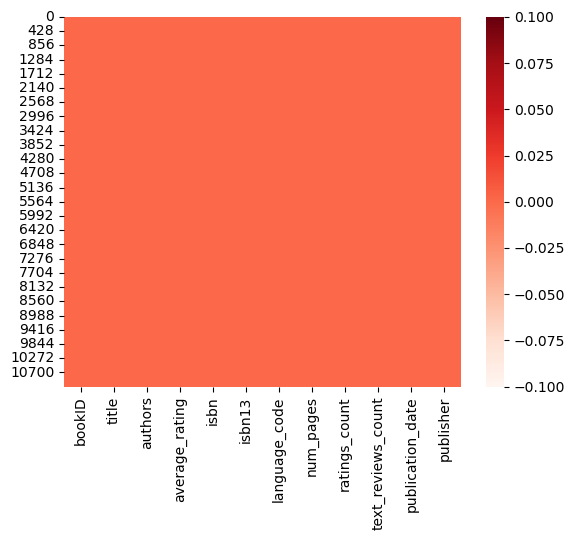

In [7]:
sns.heatmap(df_libros.isnull(), cmap = 'Reds')
plt.show()

**Observación:** El dataset no presenta datos duplicados, ni faltantes (nulos); se procede a visualizar los datos.

# Visualización 

Antes de realizar la visualización de los datos, procedo a realizar una copia del dataframe original (df_libros).

In [8]:
copia_df = df_libros.copy()
copia_df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


Ahora procedo a realizar un análisis descriptivo de las variables cualitativas y cuantitativas de mi data para conocer a mejor modo la información; para el análisis emplearé las siguientes funciones:

In [9]:
## Función para construir tablas de frecuencias, variables cualitativas
def tabla_freq(columna):
    x=pd.crosstab(index=columna,columns="count").reset_index()
    x=x.rename(columns={'count':'Frec. Abs.'})
    y=pd.crosstab(index=columna,columns="count", normalize='columns').reset_index()
    y=y.rename(columns={'count':'Frec. Rel.'})
    tabla=x.merge(y,how='left')
    tabla.rename_axis(None, axis=1)
    return tabla

## Función para contruir una tabla de análisis descriptivo, variables cuantitativas
def tabla_descriptivas(columnas):
    tabla_descriptivas=pd.DataFrame(columnas.describe())
    tabla_descriptivas.loc['coef. variation']=columnas.std()/columnas.mean() # Coeficiente variación
    tabla_descriptivas.loc['skew']=skew(columnas) # coeficiente de asimetria
    tabla_descriptivas.loc['kurtosis']=kurtosis(columnas) # coeficiente de curtosis.
    return tabla_descriptivas

Para la variable 'authors' la cual es cualitativa, obtendremos sus datos de apariciones de cada autor:

In [10]:
top_authors = df_libros['authors'].value_counts()
top_authors.head(20)

authors
Stephen King                   40
P.G. Wodehouse                 40
Rumiko Takahashi               39
Orson Scott Card               35
Agatha Christie                33
Piers Anthony                  30
Sandra Brown                   29
Mercedes Lackey                29
Dick Francis                   28
Terry Pratchett                23
James Patterson                23
Laurell K. Hamilton            23
Margaret Weis/Tracy Hickman    23
Gordon Korman                  22
Bill Bryson                    21
Janet Evanovich                21
Alan Dean Foster               21
Dan Simmons                    21
Gabriel García Márquez         20
Dean Koontz                    20
Name: count, dtype: int64

De los datos anteriores, podemos apreciar que se tienen en cuenta solo ' las apariciones ' por fila de los autores, tomando como un solo autor aquellos libros que tienen más de uno, estos los toma como un único autor, entonces obtengamos todos los autores únicos para conocer la cantidad general de colaboraciones en libros.

In [11]:
# Obtengo todos los nombres de los autores unicos
autores_separados = df_libros['authors'].str.split('/', expand=True).stack().reset_index(level=1, drop=True)

# Creamos un nuevo DataFrame con la columna de autores separados
nuevo_df = pd.DataFrame(autores_separados, columns=['autor'])

# Contamos las apariciones de cada autor y creamos un nuevo dataframe
autor_u = nuevo_df['autor'].value_counts().reset_index(name="NºPubli")

display(autor_u) # visualizamos los autores y sus apariciones 

print(f'Cantidad de autores únicos -> {len(autor_u)}')



,autor,NºPubli
0,Stephen King,99
1,William Shakespeare,93
2,J.R.R. Tolkien,55
3,Sandra Brown,48
4,Agatha Christie,47
...,...,...
9226,McDougal Littell,1
9227,Vincent Ceci,1
9228,Jaime Lucero,1
9229,Sabrina Jones,1


Cantidad de autores unicos -> 9231


Obtenidos los autores únicos de nuestra data (9231), procedemos a repartirlos en 3 distintos grupos según el número de publicaciones que tengan.
- Menos de 10 
- Entre 10 - 40
- Más de 40

Realizamos los siguientes filtros:

In [12]:
# Filtro menos de 10 = Filtro1
filtro1 = autor_u[autor_u['NºPubli'] < 10]

# Filtro entre 10 - 40 = Filtro2
filtro2 = autor_u[(autor_u['NºPubli'] >= 10) & (autor_u['NºPubli'] <= 40)]

# Filtro más de 40 = Filtro3
filtro3 = autor_u[autor_u['NºPubli'] > 40]


Procedemos a crear una nueva columna que tenga en cuenta si **EXISTE AL MENOS** un autor según los grupos determinados, tenemos:

In [13]:
# Función para verificar si al menos uno de los autores pertenece a los grupos determinados
# Tener en cuenta el  orden lógico de la función
def existe_autor_grupo(autores):
    for autor in autores.split('/'):
        if autor in filtro3['autor'].values:
            return 'Más de 40'
        elif autor in filtro2['autor'].values:
            return '10 - 40'
    return 'Menos de 10'

# Aplicar la función a la columna 'authors' para obtener la nueva columna
df_libros['GrupoAutores'] = df_libros['authors'].apply(existe_autor_grupo)

# Mostrar el DataFrame resultante
df_libros

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,GrupoAutores
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,10 - 40
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,10 - 40
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,10 - 40
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,10 - 40
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,10 - 40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press,Menos de 10
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books,Menos de 10
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books,Menos de 10
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco,Menos de 10


In [14]:
grupo_autores = tabla_freq(df_libros['GrupoAutores']).sort_values(by='Frec. Rel.', ascending=False)
grupo_autores

col_0,GrupoAutores,Frec. Abs.,Frec. Rel.
1,Menos de 10,6829,0.613953
0,10 - 40,3759,0.337948
2,Más de 40,535,0.048099


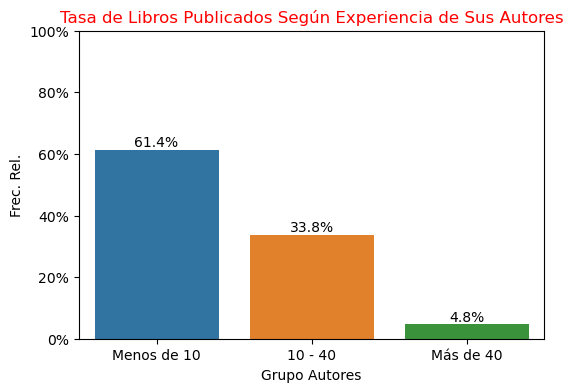

In [15]:
# grafico de torta
plt.figure(figsize=(6,4)) 
frec_grupos=sns.barplot(x=grupo_autores['GrupoAutores'],y=grupo_autores["Frec. Rel."]*100)
frec_grupos.bar_label(frec_grupos.containers[0], label_type='edge',fmt='%.1f%%') # visualizar porcentajes por barra
frec_grupos.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100)) # Visualizar eje y en mi escala porcentajes
frec_grupos.set(ylim=(0, 100))
frec_grupos.set_xlabel('Grupo Autores')
frec_grupos.set_title('Tasa de Libros Publicados Según Experiencia de Sus Autores', color = 'r')
plt.show() 



**Conclusión:** Por cada 10 libros de nuestra data, al menos 6 libros fueron escritos por autores con menos de 10 publicaciones.

Para la variable 'average_rating' cuantitativa, se tiene:

In [16]:
tabla_calificacion = tabla_descriptivas(df_libros['average_rating'])
tabla_calificacion

,average_rating
count,11123.000000
mean,3.934075
std,0.350485
min,0.000000
25%,3.770000
50%,3.960000
75%,4.140000
max,5.000000
coef. variation,0.089090
skew,-3.576959


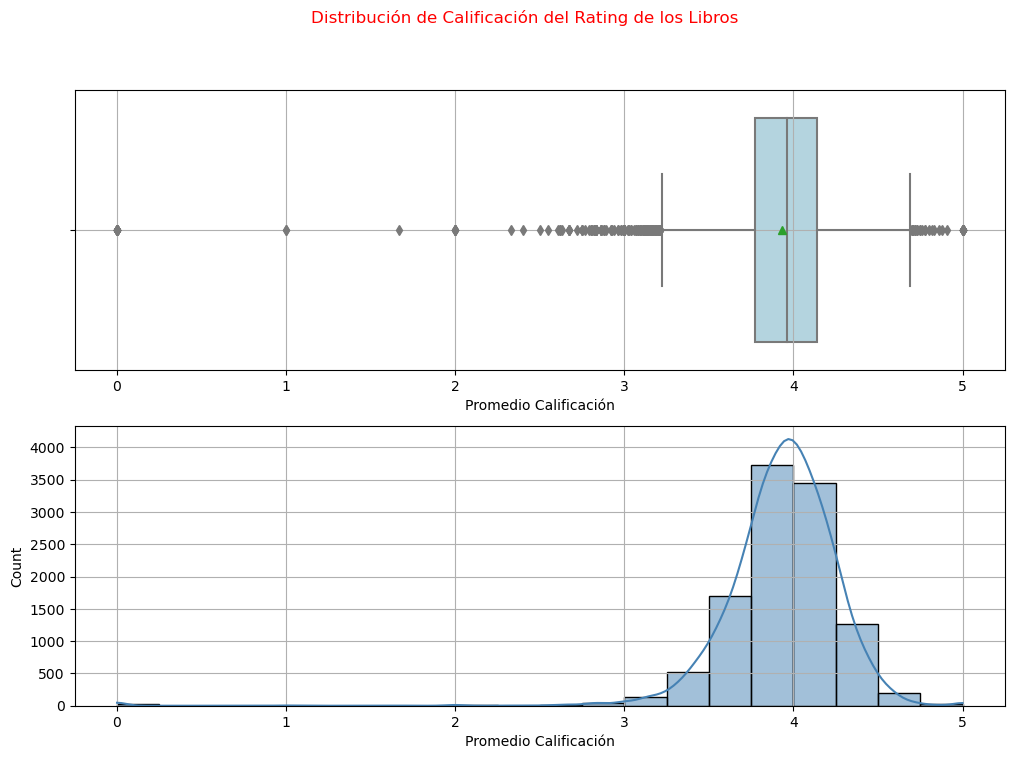

In [17]:
# Crea una figura y un conjunto de subgráficos con 2 filas y 1 columnas
fig, axes = plt.subplots(2, 1, figsize=(12,8))

# Titulo general
fig.suptitle('Distribución de Calificación del Rating de los Libros', color='r')

# Primer imagen
sns.boxplot(x=df_libros['average_rating'], ax = axes[0],color="lightblue",showmeans=True) ## crea el boxplot
axes[0].set_xlabel('Promedio Calificación')
axes[0].grid()
# Segunda imagen
sns.histplot(x=df_libros['average_rating'],kde=True,color="steelblue", ax=axes[1], bins = 20)
axes[1].set_xlabel('Promedio Calificación')
axes[1].grid()


plt.show() 

**Conclusión:** El centro de distribución está en 3.96, con el 50% de los datos agrupados alrededor de este centro entre 3.77 y 4.14. La dispersión de los datos es baja y homogénea (escala de Vargas (2007)), pero se evidencia una cantidad alta de datos atipicos. Finalmente, es posible afirmar que la distribución es relativamente simétrica, con un leve sesgo hacia la izquierda y puntiaguda (Muy concentrada en el centro con alta frecuencia de datos extremos). 

Para la variable 'language_code', es una variable cualitativa; procedemos:

In [18]:
tabla_lang_code = tabla_freq(df_libros['language_code'])
sorted_lang_code = tabla_lang_code.sort_values(by='Frec. Rel.', ascending=False)
display(sorted_lang_code)
len(sorted_lang_code) # Cuantos lenguajes hay

col_0,language_code,Frec. Abs.,Frec. Rel.
5,eng,8908,0.800863
4,en-US,1408,0.126585
21,spa,218,0.019599
3,en-GB,214,0.019239
7,fre,144,0.012946
8,ger,99,0.008900
13,jpn,46,0.004136
16,mul,19,0.001708
26,zho,14,0.001259
11,grc,11,0.000989


27

Se tienen 27 distintas opciones de código por lenguaje, para lograr una mejor visualización de los datos; procedemos a agrupar los libros que están en inglés y cuales no, entonces:

In [19]:
ingles = ['eng', 'en-US', 'en-GB']
df_libros['Idiomas'] = np.where(df_libros['language_code'].isin(ingles),'Inglés','Otros Idiomas')
df_libros

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,GrupoAutores,Idiomas
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,10 - 40,Inglés
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,10 - 40,Inglés
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,10 - 40,Inglés
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,10 - 40,Inglés
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,10 - 40,Inglés
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press,Menos de 10,Inglés
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books,Menos de 10,Inglés
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books,Menos de 10,Inglés
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco,Menos de 10,Inglés


In [20]:
tabla_idioma = tabla_freq(df_libros['Idiomas'])
tabla_idioma

col_0,Idiomas,Frec. Abs.,Frec. Rel.
0,Inglés,10530,0.946687
1,Otros Idiomas,593,0.053313


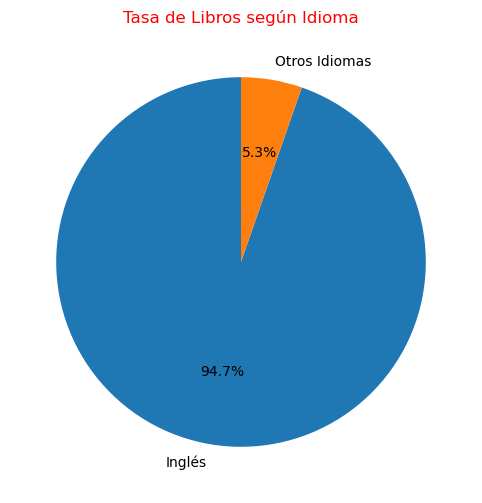

In [21]:
# grafico de torta
plt.figure(figsize=(8,6)) 
plt.pie(tabla_idioma["Frec. Rel."], labels=tabla_idioma["Idiomas"],autopct='%1.1f%%',startangle=90)
plt.title('Tasa de Libros según Idioma', color='r')
plt.show() 

**Conclusión:** De la tabla entregada y la gráfica visualizada se aprecia que la mayor cantidad de libros se encuentran en el idioma 'inglés'. Es correcto afirmar que por cada 10 libros, 9 de ellos están en inglés.

para la variable num_pages, la cual es cualitativa; se tiene:

In [22]:
tabla_num_pages = tabla_descriptivas(df_libros['num_pages'])
tabla_num_pages


,num_pages
count,11123.000000
mean,336.405556
std,241.152626
min,0.000000
25%,192.000000
50%,299.000000
75%,416.000000
max,6576.000000
coef. variation,0.716851
skew,4.271202


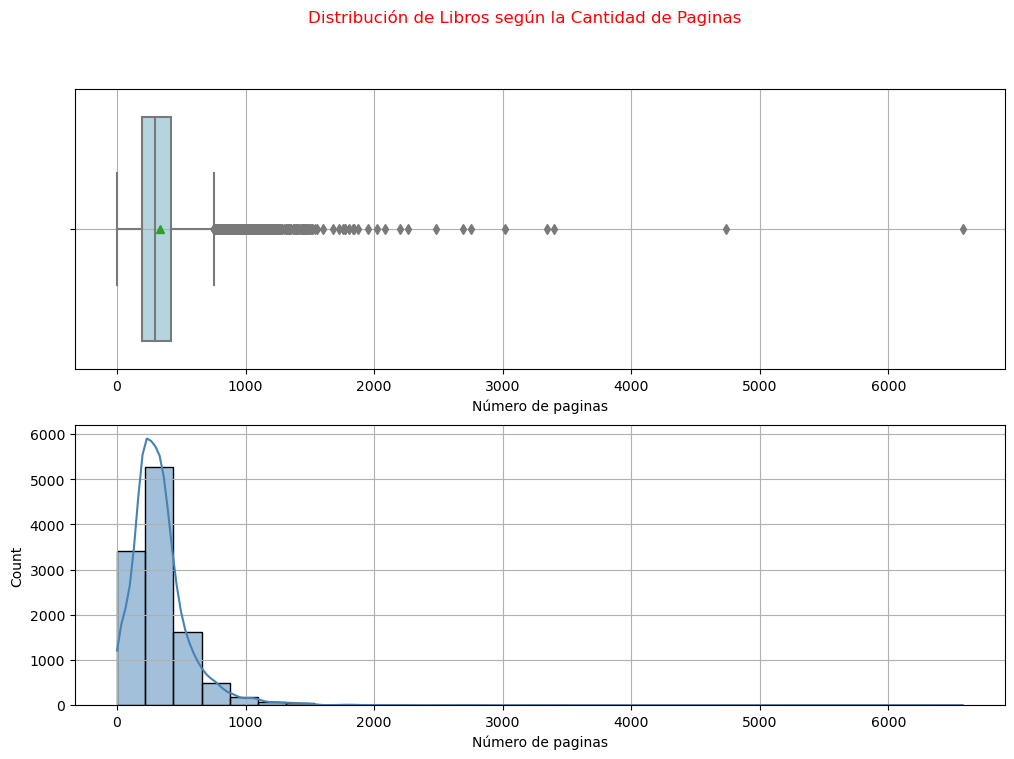

In [23]:
# Crea una figura y un conjunto de subgráficos con 2 filas y 1 columnas
fig, axes = plt.subplots(2, 1, figsize=(12,8))

# Titulo general
fig.suptitle('Distribución de Libros según la Cantidad de Paginas', color='r')

# Primer imagen
box_num_pages=sns.boxplot(x=df_libros['num_pages'], ax = axes[0],color="lightblue",showmeans=True) ## crea el boxplot
axes[0].set_xlabel('Número de paginas')
axes[0].grid()
# Segunda imagen
sns.histplot(x=df_libros['num_pages'],kde=True,color="steelblue", ax=axes[1], bins= 30)
axes[1].set_xlabel('Número de paginas')
axes[1].grid()


plt.show() 

**Conclusión:** El centro de la distribución está en 299 páginas, con el 50% de los datos agrupados alrededor de este centro entre 192 y 416 páginas. La dispersión de los datos es relativamente alta, aproximadamente el 71% de los datos. Se aprecia una alta cantidad de datos atipicos. Finalmente, es posible afirmar que la distribución es relativamente asimétrica, sesgada hacia la derecha y puntiaguda (alta concentración de datos en el centro y presenta una alta frecuencia de datos extremos).

Para la variable 'ratings_count' la cual es cuantitativa, tenemos: 

In [24]:
tabla_ratings_count = tabla_descriptivas(df_libros['ratings_count'])
tabla_ratings_count


,ratings_count
count,1.112300e+04
mean,1.794285e+04
std,1.124992e+05
min,0.000000e+00
25%,1.040000e+02
50%,7.450000e+02
75%,5.000500e+03
max,4.597666e+06
coef. variation,6.269860e+00
skew,1.769157e+01


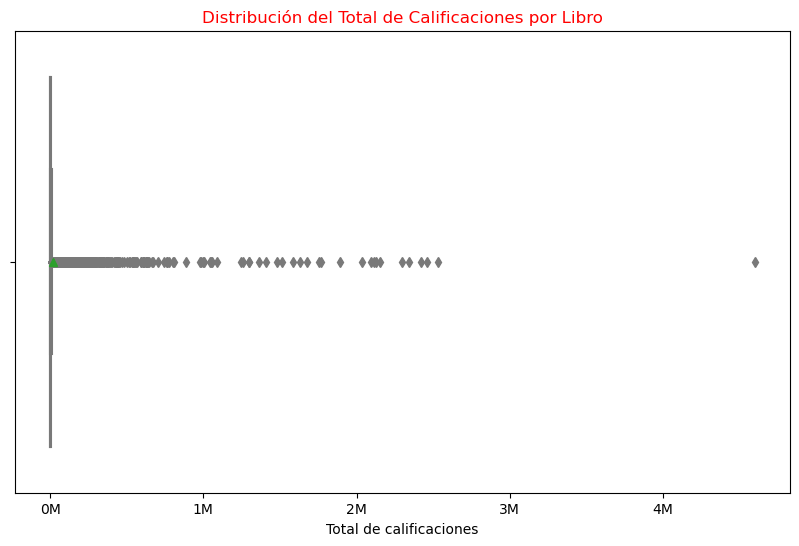

In [25]:
plt.figure(figsize=(10, 6))
# Primer imagen
box_rat_total = sns.boxplot(x=df_libros['ratings_count'],color="lightblue",showmeans=True) ## crea el boxplot
box_rat_total.set_xlabel('Total de calificaciones')
box_rat_total.set_title('Distribución del Total de Calificaciones por Libro', color = 'r')

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: "{:.0f}M".format(x / 1e6)))

plt.show() 

**Conclusiones:** De la tabla de descripción estadística de la columna 'ratings_count' se aprecia que el centro de la distribución está en 745 calificaciones, con el 50% de los datos agrupados alrededor de este, entre 104 y 5000 calificaciones. La dispersión de los datos es demasiado alta y se aprecia una alta cantidad de datos atípicos. Finalmente, es posible afirmar que la distribución es relativamente asimétrica a la derecha y puntiaguda (alta concentración de datos en el centro pero con alta frecuencia de datos extremos).

Para la variable 'text_reviews_count' la cual es cuantitativa, se tiene: 

In [26]:
tabla_tr_count = tabla_descriptivas(df_libros['text_reviews_count'])
tabla_tr_count

,text_reviews_count
count,11123.000000
mean,542.048099
std,2576.619589
min,0.000000
25%,9.000000
50%,47.000000
75%,238.000000
max,94265.000000
coef. variation,4.753489
skew,16.172915


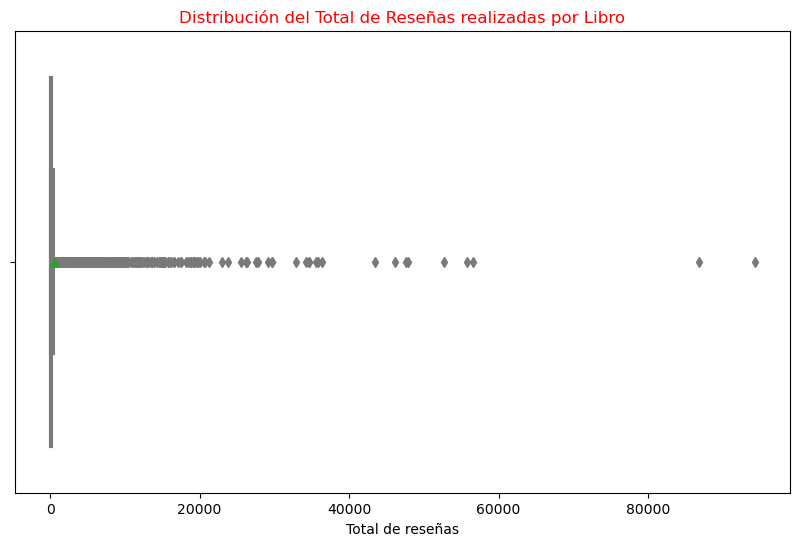

In [27]:
plt.figure(figsize=(10, 6))
# diagrama de caja variable de reseñas
box_rt_total = sns.boxplot(x=df_libros['text_reviews_count'],color="lightblue",showmeans=True) ## crea el boxplot
box_rt_total.set_xlabel('Total de reseñas')
box_rt_total.set_title('Distribución del Total de Reseñas realizadas por Libro', color = 'r')
plt.show()

**Conclusión:** De la tabla suministrada y la gráfica visualizada se aprecia que el centro de la distribución está en 47 reseñas con el 50% de los datos agrupados alrededor de este, entre 9 y 238 reseñas. La dispersión de los datos es relativamente alta y se observa una gran serie de datos atipicos. Finalmente, es posible afirmar que la distribución es asimétrica, sesgada hacia la derecha y puntiaguda( con una alta frecuencia de datos extremos).

Para la variable 'publisher' vamos a verificar la cantidad de editoriales y su distribución:

In [28]:
cant_publisher = df_libros['publisher'].value_counts()
display(cant_publisher)
print(f'Cantidad de Editoriales Unicas -> {len(cant_publisher)}')

publisher
Vintage                        318
Penguin Books                  261
Penguin Classics               184
Mariner Books                  150
Ballantine Books               144
                              ... 
University of Calgary Press      1
Marlowe & Company                1
University Press of America      1
Abstract Studio                  1
VeloPress                        1
Name: count, Length: 2290, dtype: int64

Cantidad de Editoriales Unicas -> 2290


Se aprecian 2290 editoriales; visualizar toda la data no se apreciaría nada de forma clara. Procedemos a agrupar 4 distintos rangos.
- Menos de 20
- 21 - 50 Publicaciones
- 51 - 100 Publicaciones
- Más de 100

Para realizar este proceso, emplearemos el siguiente código:

In [29]:
# Creamos función para asignar los grupos
def asignar_grupo(num_publicaciones):
    if 50 >= num_publicaciones >= 10:
        return 'Entre 10 y 50'
    elif num_publicaciones > 50:
        return 'Más de 50'
    else:
        return 'Menos de 10'
    
# Mapeamos la función al DataFrame para obtener el grupo correspondiente
df_libros['Nº.Publicaciones por Editorial'] = df_libros['publisher'].map(cant_publisher.apply(asignar_grupo))

df_libros

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,GrupoAutores,Idiomas,Nº.Publicaciones por Editorial
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,10 - 40,Inglés,Entre 10 y 50
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,10 - 40,Inglés,Entre 10 y 50
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,10 - 40,Inglés,Entre 10 y 50
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,10 - 40,Inglés,Entre 10 y 50
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,10 - 40,Inglés,Entre 10 y 50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press,Menos de 10,Inglés,Entre 10 y 50
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books,Menos de 10,Inglés,Más de 50
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books,Menos de 10,Inglés,Más de 50
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco,Menos de 10,Inglés,Entre 10 y 50


Con las editoriales clasificadas en 2 grupos, procedemos a realizar el análisis:

In [30]:
tabla_publi_edit = tabla_freq(df_libros['Nº.Publicaciones por Editorial']).sort_values(by='Frec. Rel.', ascending=False)
display(tabla_publi_edit)


col_0,Nº.Publicaciones por Editorial,Frec. Abs.,Frec. Rel.
0,Entre 10 y 50,4195,0.377146
1,Menos de 10,4025,0.361863
2,Más de 50,2903,0.260991


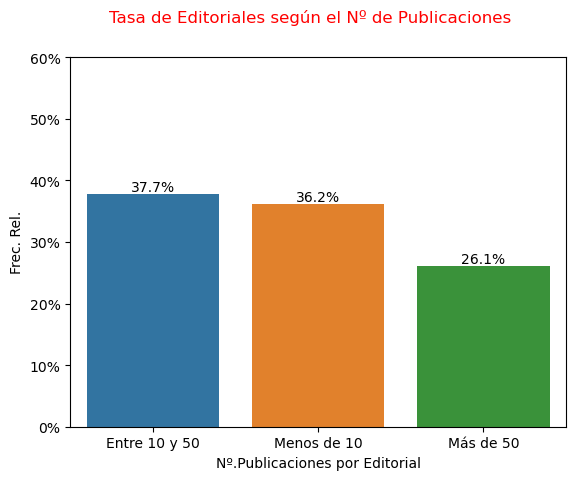

In [31]:
# Titulo general
plt.suptitle('Tasa de Editoriales según el Nº de Publicaciones', color='r')

# datos grafico de barras
frec_editoriales=sns.barplot(x=tabla_publi_edit['Nº.Publicaciones por Editorial'],y=tabla_publi_edit["Frec. Rel."]*100)
frec_editoriales.bar_label(frec_editoriales.containers[0], label_type='edge',fmt='%.1f%%') # visualizar porcentajes por barra
frec_editoriales.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100)) # Visualizar eje y en mi escala porcentajes
frec_editoriales.set(ylim=(0, 60))

plt.show() 

**Conclusión:** De cada 4 libros, almenos **1 libro** fue publicado en editoriales que tienen más de 50 publicaciones.

Finalizado el análisis individual de las variable y agrupando de mejor forma la información, nuestro data queda:

In [32]:
df_libros

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,GrupoAutores,Idiomas,Nº.Publicaciones por Editorial
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,10 - 40,Inglés,Entre 10 y 50
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,10 - 40,Inglés,Entre 10 y 50
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,10 - 40,Inglés,Entre 10 y 50
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,10 - 40,Inglés,Entre 10 y 50
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,10 - 40,Inglés,Entre 10 y 50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press,Menos de 10,Inglés,Entre 10 y 50
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books,Menos de 10,Inglés,Más de 50
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books,Menos de 10,Inglés,Más de 50
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco,Menos de 10,Inglés,Entre 10 y 50


Procedemos a realizar un análisis de la relación que existe entre las variables cualitativas('GrupoAutores', 'Idiomas', 'Publicaciones por Editorial') y nuestra variable cuantitativa('average_rating').

In [33]:
# Relación de GrupoAutores Y average_rating
autores_rating = df_libros.groupby('GrupoAutores')['average_rating'].describe()
autores_rating

,count,mean,std,min,25%,50%,75%,max
GrupoAutores,,,,,,,,
10 - 40,3759.0,3.959377,0.280050,0.00,3.79,3.96,4.15,5.00
Menos de 10,6829.0,3.916093,0.388590,0.00,3.76,3.95,4.13,5.00
Más de 40,535.0,3.985832,0.253811,2.86,3.83,3.98,4.15,4.64


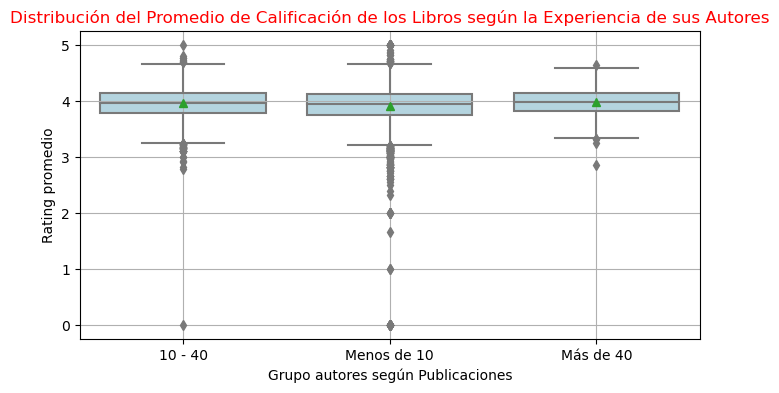

In [34]:
plt.figure(figsize=(8,4)) 
boxplot_des_alt=sns.boxplot(x=df_libros['GrupoAutores'],y=df_libros['average_rating'],color="lightblue",showmeans=True) ## crea el boxplot
boxplot_des_alt.set_xlabel('Grupo autores según Publicaciones') ## cambia el título del eje x
boxplot_des_alt.set_ylabel('Rating promedio') ## cambia el título del eje y
boxplot_des_alt.set_title('Distribución del Promedio de Calificación de los Libros según la Experiencia de sus Autores', color='r')
plt.grid()
plt.show()  

**Conclusión:** De la tabla suministrada y el gráfico visualizado se aprecia que la calificación promedio de los libros está relacionada directamente con la experiencia de sus autores, evidenciando los datos obtenidos para sus **medias**:

- Más de 40 = 3.98
- Entre 10 - 40 = 3.95
- Menos de 10 = 3.91

In [35]:
# Relación de Idiomas Y average_rating
idiomas_rating = df_libros.groupby('Idiomas')['average_rating'].describe()
idiomas_rating

,count,mean,std,min,25%,50%,75%,max
Idiomas,,,,,,,,
Inglés,10530.0,3.931251,0.348858,0.0,3.77,3.96,4.13,5.0
Otros Idiomas,593.0,3.984233,0.375009,0.0,3.81,3.99,4.20,5.0


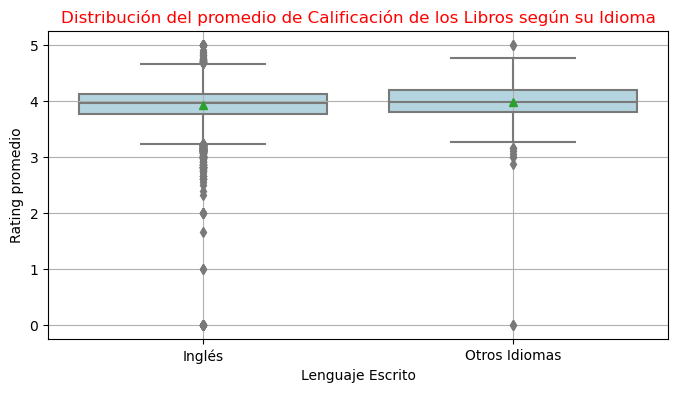

In [36]:
plt.figure(figsize=(8,4)) 
boxplot_des_alt=sns.boxplot(x=df_libros['Idiomas'],y=df_libros['average_rating'],color="lightblue",showmeans=True) ## crea el boxplot
boxplot_des_alt.set_xlabel('Lenguaje Escrito') ## cambia el título del eje x
boxplot_des_alt.set_ylabel('Rating promedio') ## cambia el título del eje y
boxplot_des_alt.set_title('Distribución del promedio de Calificación de los Libros según su Idioma', color='r')
plt.grid()
plt.show()  

**Conclusión:** Se aprecia que los libros escritos en otros idiomas en promedio tuvieron una mejor calificación que los libros escritos en inglés (media 3.98 vs 3.93, respectivamente).

In [37]:
# Relación de Idiomas y average_rating
editorial_rating = df_libros.groupby('Nº.Publicaciones por Editorial')['average_rating'].describe()
editorial_rating


,count,mean,std,min,25%,50%,75%,max
Nº.Publicaciones por Editorial,,,,,,,,
Entre 10 y 50,4195.0,3.940465,0.299582,0.00,3.78,3.96,4.13,5.0
Menos de 10,4025.0,3.926363,0.441749,0.00,3.76,3.97,4.15,5.0
Más de 50,2903.0,3.935536,0.265230,2.33,3.78,3.94,4.11,5.0


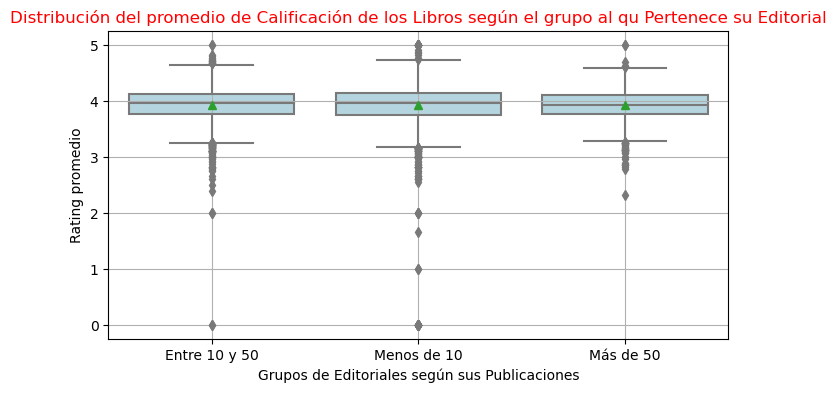

In [38]:
plt.figure(figsize=(8,4)) 
boxplot_des_alt=sns.boxplot(x=df_libros['Nº.Publicaciones por Editorial'],y=df_libros['average_rating'],color="lightblue",showmeans=True) ## crea el boxplot
boxplot_des_alt.set_xlabel('Grupos de Editoriales según sus Publicaciones') ## cambia el título del eje x
boxplot_des_alt.set_ylabel('Rating promedio') ## cambia el título del eje y
boxplot_des_alt.set_title('Distribución del promedio de Calificación de los Libros según el grupo al qu Pertenece su Editorial', color='r')
plt.grid()
plt.show() 

**Conclusión:** Analizando la muestra, podemos apreciar la relación que tiene la editorial directamente con la calificación promedio de los libros, evidenciando los siguientes datos para sus medios:

- Entre 10 y 50 = 3.94
- Más de 50 = 3.93
- Menos de 10 = 3.92

Ahora procedemos a observar la relación entre las variables cuantitativas (num_pages, ratings_count, text_reviews_count) y la variable 'average_rating'(variable cuantitativa):

Empezamos con la variable num_pages:

In [39]:
#Calculamos el coeficiente de correlacion entre las dos variables cuantitativas a explorar
cor_num_r =  df_libros['num_pages'].corr(df_libros['average_rating'])

# Para una visualizacion mas tecnica, se entregan los datos en una tabal.
tabla_cor_num_r = pd.DataFrame({'Variable 1': 'num_pages',
                                  'Variable 2': 'average_rating',
                                  'Coeficiente de correlación': [cor_num_r]})
tabla_cor_num_r

,Variable 1,Variable 2,Coeficiente de correlación
0,num_pages,average_rating,0.150477


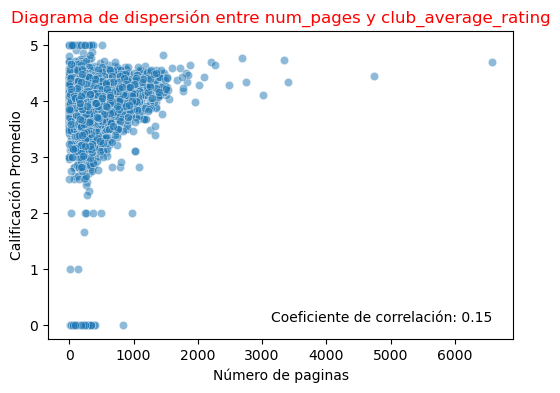

In [40]:
plt.figure(figsize=(6, 4))
scatter_num_r = sns.scatterplot(data=df_libros, x='num_pages', y='average_rating', alpha=0.5)

# Realizamos el grafico de dispersion en relación de las dos variables a explorar
scatter_num_r.set_xlabel('Número de paginas') 
scatter_num_r.set_ylabel('Calificación Promedio') 
scatter_num_r.set_title('Diagrama de dispersión entre num_pages y club_average_rating', color= 'r')

# para mostrar el coeficiente de Pearson en la grafica

scatter_num_r.text(df_libros['num_pages'].max(), df_libros['average_rating'].min(), f'Coeficiente de correlación: {cor_num_r:.2f}', ha='right', va='bottom')
plt.show()

**Conclusión:** Es correcto afirmar que 'existe' una correlación positiva pero relativamente débil entre el número de páginas que tiene un libro y su calificación promedio.

Procemos a análizar la relación entre ratings_count y average_rating:

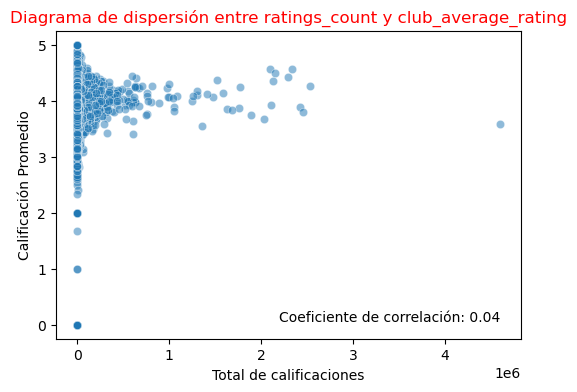

In [41]:
#Calculamos el coeficiente de correlacion entre las dos variables cuantitativas a explorar
cor_rc_r =  df_libros['ratings_count'].corr(df_libros['average_rating'])

plt.figure(figsize=(6, 4))
scatter_num_r = sns.scatterplot(data=df_libros, x='ratings_count', y='average_rating', alpha=0.5)

# Realizamos el grafico de dispersion en relación de las dos variables a explorar
scatter_num_r.set_xlabel('Total de calificaciones') 
scatter_num_r.set_ylabel('Calificación Promedio') 
scatter_num_r.set_title('Diagrama de dispersión entre ratings_count y club_average_rating', color= 'r')

# para mostrar el coeficiente de Pearson en la grafica

scatter_num_r.text(df_libros['ratings_count'].max(), df_libros['average_rating'].min(), f'Coeficiente de correlación: {cor_rc_r:.2f}', ha='right', va='bottom')
plt.show()

**Conclusión:** De la gráfica obtenida y al observar su coef de correlación es posible afirmar que **NO EXISTE** correlación entre las dos variables representadas.

Relación entre las variables: text_reviews_count y average_rating:

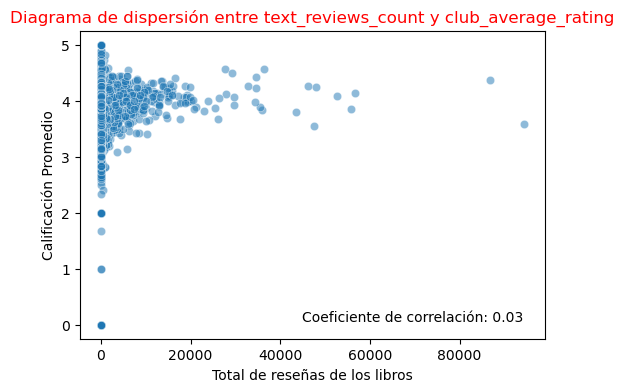

In [42]:
#Calculamos el coeficiente de correlacion entre las dos variables cuantitativas a explorar
cor_trc_r =  df_libros['text_reviews_count'].corr(df_libros['average_rating'])

plt.figure(figsize=(6, 4))
scatter_trc_r = sns.scatterplot(data=df_libros, x='text_reviews_count', y='average_rating', alpha=0.5)

# Realizamos el grafico de dispersion en relación de las dos variables a explorar
scatter_trc_r.set_xlabel('Total de reseñas de los libros') 
scatter_trc_r.set_ylabel('Calificación Promedio') 
scatter_trc_r.set_title('Diagrama de dispersión entre text_reviews_count y club_average_rating', color= 'r')

# para mostrar el coeficiente de Pearson en la grafica

scatter_trc_r.text(df_libros['text_reviews_count'].max(), df_libros['average_rating'].min(), f'Coeficiente de correlación: {cor_trc_r:.2f}', ha='right', va='bottom')
plt.show()

**Conclusión:** De la gráfica obtenida y al observar su coef de correlación es posible afirmar que **NO EXISTE** correlación entre las dos variables representadas.

## Preprocesamiento de Datos

Este proceso consiste en convertir los datos en un formato legible para la máquina, que pueda ser interpretado, analizado y utilizado por algoritmos de aprendizaje automático. En esta instancia aplicaremos técnicas de detección de anomalías e ingeniería de características:

#### 1) Detección de anomalías:

Teniendo en cuenta las variables cuantitativas que visualizamos anteriormente (num_pages, ratings_count, text_reviews_count), en sus gráficas apreciamos múltiples datos atipicos, entonces el objetivo principal de esta sección va ser la eliminación de dichos valores atípicos, lo cual repercutirá positivamente en la precisión de nuestro modelo ML.

**Nota:** Estas correcciones las haremos en la copia que habíamos guardado del dataframe original.
- copia_df (dataframe original)

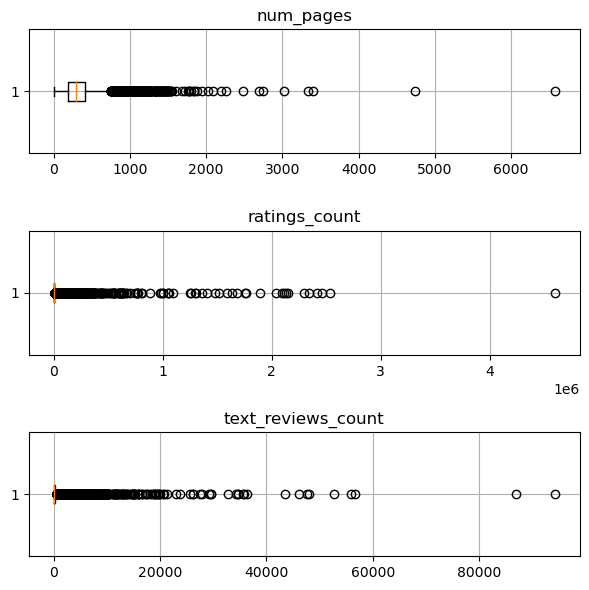

In [43]:
fig, axs = plt.subplots(3, 1, figsize=(6, 6))

# grafico de caja num_pages
axs[0].boxplot(x=copia_df['num_pages'], vert = False)
axs[0].set_title('num_pages')
axs[0].grid()

# grafico de caja ratings_count
axs[1].boxplot(x=copia_df['ratings_count'], vert = False)
axs[1].set_title('ratings_count')
axs[1].grid()

# grafico de caja text_reviews_count
axs[2].boxplot(x=copia_df['text_reviews_count'], vert = False)
axs[2].set_title('text_reviews_count')
axs[2].grid()

# Ajustar el diseño
plt.tight_layout()

plt.show()

**Nota:** Recordemos que en el punto de VISUALIZACIÓN DE LOS DATOS ya habíamos obtenido el análisis estadístico de estas variables y sus gráficas, a continuación invocaremos sus descripciones estadísticas:

In [44]:
display(tabla_num_pages)
display(tabla_ratings_count)
display(tabla_tr_count)

,num_pages
count,11123.000000
mean,336.405556
std,241.152626
min,0.000000
25%,192.000000
50%,299.000000
75%,416.000000
max,6576.000000
coef. variation,0.716851
skew,4.271202


,ratings_count
count,1.112300e+04
mean,1.794285e+04
std,1.124992e+05
min,0.000000e+00
25%,1.040000e+02
50%,7.450000e+02
75%,5.000500e+03
max,4.597666e+06
coef. variation,6.269860e+00
skew,1.769157e+01


,text_reviews_count
count,11123.000000
mean,542.048099
std,2576.619589
min,0.000000
25%,9.000000
50%,47.000000
75%,238.000000
max,94265.000000
coef. variation,4.753489
skew,16.172915


De las gráficas visualizadas, procedamos a calcular el rango intercuartílico (IQR) y determinemos qué valores se considerarían atípicos utilizando la técnica basada en los cuartiles (IQR). Para obtener su límite superior, tenemos la siguiente función:

In [45]:
def calcular_limites(Q1, Q3):
    IQR = Q3 - Q1
    lim_sup = Q3 + 1.5 * IQR
    return lim_sup

In [46]:
# num_pages
lim_num = calcular_limites(192,416)
print(f"Para la columna 'num_pages' su LimiteSuperior -> {lim_num} ")

# ratings_count
lim_rc = calcular_limites(104,5000)
print(f"Para la columna 'ratings_count' su LimiteSuperior -> {lim_rc} ")

# text_reviews_count
lim_trc = calcular_limites(9,238)
print(f"Para la columna 'text_reviews_count' su LimiteSuperior -> {lim_trc} ")

Para la columna 'num_pages' su LimiteSuperior -> 752.0 
Para la columna 'ratings_count' su LimiteSuperior -> 12344.0 
Para la columna 'text_reviews_count' su LimiteSuperior -> 581.5 


In [47]:
# Eliminamos datos atípicos de la variable num_pages
copia_df = copia_df.drop(copia_df.index[copia_df['num_pages'] > 752])

# Eliminamos datos atípicos de la variable ratings_count
copia_df = copia_df.drop(copia_df.index[copia_df['ratings_count'] > 12344])

# Eliminamos datos atípicos de la variable text_reviews_count
copia_df = copia_df.drop(copia_df.index[copia_df['text_reviews_count'] > 581.5])

Observemos la distribución luego de eliminar los valores lejanos al limite superior:

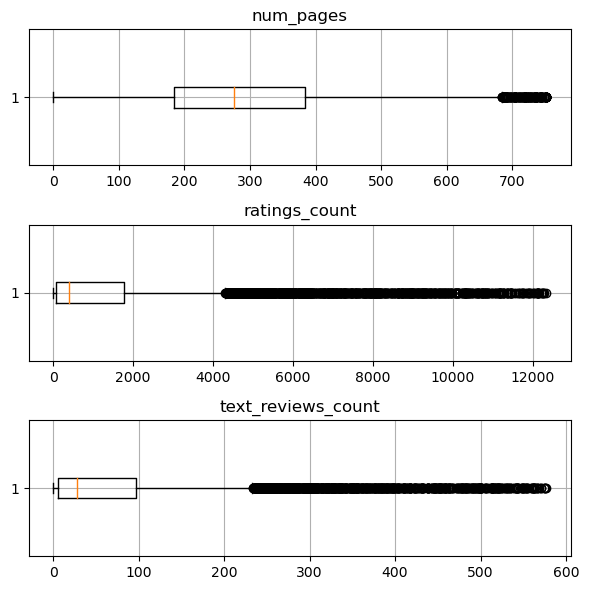

In [48]:
fig, axs = plt.subplots(3, 1, figsize=(6, 6))

# grafico de caja num_pages
axs[0].boxplot(x=copia_df['num_pages'], vert = False)
axs[0].set_title('num_pages')
axs[0].grid()

# grafico de caja ratings_count
axs[1].boxplot(x=copia_df['ratings_count'], vert = False)
axs[1].set_title('ratings_count')
axs[1].grid()

# grafico de caja text_reviews_count
axs[2].boxplot(x=copia_df['text_reviews_count'], vert = False)
axs[2].set_title('text_reviews_count')
axs[2].grid()

# Ajustar el diseño
plt.tight_layout()

plt.show()

**Conclusión:** Se aprecia la eliminación de los datos lejanos al límite superior, aun así se observa un gran peso en los datos extremos del cuartil Q3.

In [49]:
print(f'Data despues de la eliminación de datos atípicos -> {len(copia_df)}') 

Data despues de la eliminación de datos atípicos -> 8716


#### 2) Ingeniería de Características:
El objetivo principal de esta sección es seleccionar y transformar las variables para la creación del modelo predictivo. Esto se debe a que muchos algoritmos de ML requieren que su entrada sea numérica, por lo tanto, características categóricas como el título, los autores, el código de idioma y la editorial deben transformarse en características numéricas antes de que podamos utilizar cualquiera de estos algoritmos. Se tiene:

In [50]:
# Codificamos las columnas categoricas mencionadas anteriormente:

codificador = LabelEncoder() #inicializamos el LabelEncoder

# variable title
copia_df['title'] = codificador.fit_transform(copia_df['title'])

#variable 'authors'
copia_df['authors'] = codificador.fit_transform(copia_df['authors'])

#variable 'publisher'
copia_df['publisher'] = codificador.fit_transform(copia_df['publisher'])

# # columnas isbn y ibn-13
# copia_df['isbn'] = codificador.fit_transform(copia_df['isbn'])
# copia_df['isbn13'] = codificador.fit_transform(copia_df['isbn13'])
#variable language_code

# Al ser la variable con menor numero de categorias unicas empleo get_dummies
codi_lang = pd.get_dummies(copia_df['language_code'])
copia_df = pd.concat([copia_df, codi_lang], axis = 1)


In [51]:
copia_df

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
2,4,2430,2289,4.42,0439554896,9780439554893,eng,352,6333,244,...,False,False,False,False,False,False,False,False,False,False
5,9,7746,5471,3.74,0976540606,9780976540601,en-US,152,19,1,...,False,False,False,False,False,False,False,False,False,False
9,14,6236,1281,4.22,1400052920,9781400052929,eng,215,4930,460,...,False,False,False,False,False,False,False,False,False,False
10,16,6236,1286,4.22,0739322206,9780739322208,eng,6,1266,253,...,False,False,False,False,False,False,False,False,False,False
13,22,773,528,3.44,0767915062,9780767915069,eng,55,7270,499,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,1932,5678,4.06,1560254416,9781560254416,eng,512,156,20,...,False,False,False,False,False,False,False,False,False,False
11119,45633,8171,5677,4.08,0140110879,9780140110876,eng,635,783,56,...,False,False,False,False,False,False,False,False,False,False
11120,45634,6270,5677,3.96,0140131965,9780140131963,eng,415,820,95,...,False,False,False,False,False,False,False,False,False,False
11121,45639,4339,5677,3.72,0060878827,9780060878825,eng,434,769,139,...,False,False,False,False,False,False,False,False,False,False


## Modelo de Machine Learning

El propósito de esta sección es crear un modelo para predecir calificaciones de libros. Usamos regresión lineal para construir un modelo que predice las calificaciones de los libros. El algoritmo de regresión lineal es un método básico de análisis predictivo. Hay dos tipos de variables en los modelos de regresión lineal:
1) La variable de entrada o predictora es la variable o variables que ayudan a predecir el valor de la variable de salida. Generalmente se le llama X.
2) La variable de salida es la variable que queremos predecir. Generalmente se le llama Y.

In [52]:
copia_df.columns


Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'ale', 'ara', 'en-CA', 'en-GB',
       'en-US', 'eng', 'enm', 'fre', 'ger', 'gla', 'glg', 'grc', 'ita', 'jpn',
       'lat', 'mul', 'nl', 'nor', 'por', 'rus', 'spa', 'srp', 'swe', 'tur',
       'wel', 'zho'],
      dtype='object')

In [53]:
# dividimos la data, los atributos de la variable a predecir
X = copia_df[['title', 'authors','num_pages', 'ratings_count', 'text_reviews_count','publisher',
              'ale', 'ara', 'en-CA', 'en-GB','en-US', 'eng', 'enm', 'fre', 'ger', 'gla', 'glg',
              'grc', 'ita', 'jpn','lat', 'mul', 'nl', 'nor', 'por', 'rus', 'spa', 'srp', 'swe', 'tur','wel', 'zho']]
y = copia_df['average_rating']

In [54]:
#variables para predecir la calificación
X

,title,authors,num_pages,ratings_count,text_reviews_count,publisher,ale,ara,en-CA,en-GB,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
2,2430,2289,352,6333,244,1615,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,7746,5471,152,19,1,1251,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,6236,1281,215,4930,460,434,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,6236,1286,6,1266,253,1505,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13,773,528,55,7270,499,299,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,1932,5678,512,156,20,460,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11119,8171,5677,635,783,56,1359,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11120,6270,5677,415,820,95,1359,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11121,4339,5677,434,769,139,564,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
# Datos a predecir 
y

2        4.42
5        3.74
9        4.22
10       4.22
13       3.44
         ... 
11118    4.06
11119    4.08
11120    3.96
11121    3.72
11122    3.91
Name: average_rating, Length: 8716, dtype: float64

In [56]:
# Dividimos el 80% de los datos para entrenamiento y el 20% para pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [57]:
# Para entrenar nuestro algoritmo debemos crear una instancia del modelo
lr = LinearRegression()
lr.fit(X_train, y_train) # entrenamos el modelo

LinearRegression()

Ahora, procedemos a utilizar los datos de prueba para comprobar la precisión de nuestro algoritmo para predecir la calificación (average_rating):

In [58]:
prediccion = lr.predict(X_test)

In [59]:
resultado = {'Real':y_test, 'Predicción':prediccion}

resultado = pd.DataFrame(resultado)
resultado = resultado.head(10)
resultado

,Real,Predicción
1992,3.86,3.943413
7807,3.29,3.908076
6997,4.00,3.987258
6527,4.23,3.851089
5222,4.08,3.852254
5532,3.51,3.859093
8315,4.50,4.413863
10677,3.94,3.936062
6724,3.96,3.894355
11008,3.88,3.885516


Visualicemos esta comparación:

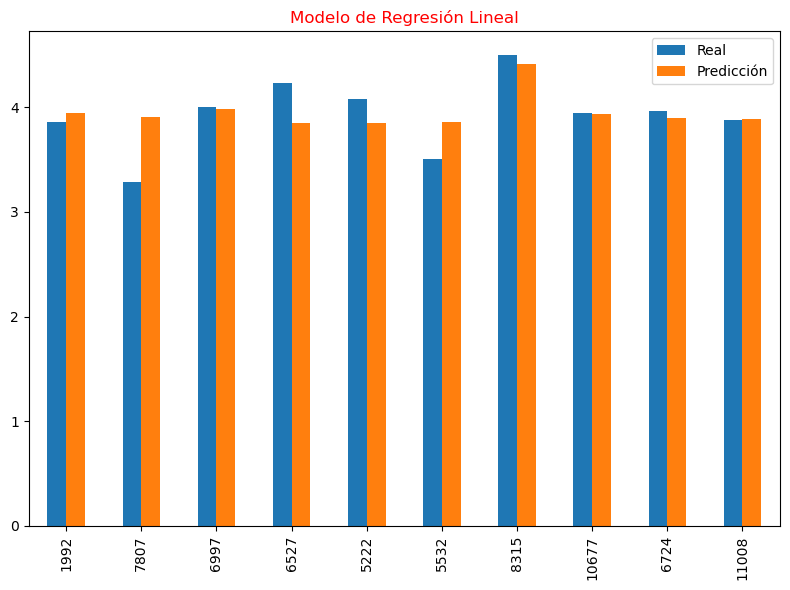

In [60]:
resultado.plot(kind='bar', figsize=(8, 6))
plt.title('Modelo de Regresión Lineal', color='r')
plt.tight_layout()
plt.show()

Se aprecia que el modelo no es muy preciso, pero sus valores se aproximan a los reales. Evaluemos el modelo:

In [61]:
# Error Absoluto Medio
MAE = metrics.mean_absolute_error(y_test, prediccion)
print(f'El MAE es: {MAE}')

# Error Cuadrático Medio
MSE = metrics.mean_squared_error(y_test, prediccion)
print(f"El MSE es: {MSE}")

#Raíz del Error Cuadrático Medio
RMSE = np.sqrt(metrics.mean_squared_error(y_test, prediccion))
print(f"El RMSE es: {RMSE}")

#Coeficiente de determinación R2
print(f'El valor de R2 es: {lr.score(X_train, y_train)}')

El MAE es: 0.23404358969833247
El MSE es: 0.12946705643418652
El RMSE es: 0.3598153087824176
El valor de R2 es: 0.04643968268797982


**Conclusión:** De los valos obtenidos del modelo aplicado, es posible afirmar que el modelo parece tener  una precisión razonable en términos de los errores absolutos y cuadráticos, pero la capacidad para responder a la alta variabilidad de los datos es muy limitada, reflejando su **MUY BAJO** valor de R2.